In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact

%matplotlib inline

In [52]:
T = np.array([120,115,110,105,100,95,90,85,80,75,74,73,72,71,70,65,60,55,50,45,40]) #temperatura
CS_T =np.array([4320,10700,4100,9314,2770,15600,6720,49200,
      92300,590000,790000,890000,840000,760000,
      690000,62000,40000,11000,8400,4400,3700]) #Cuentas simples cuando la temperatura fue variada

In [53]:
T1= T[::-1]
CS_T1=CS_T[::-1]
print(T1)

[ 40  45  50  55  60  65  70  71  72  73  74  75  80  85  90  95 100 105
 110 115 120]


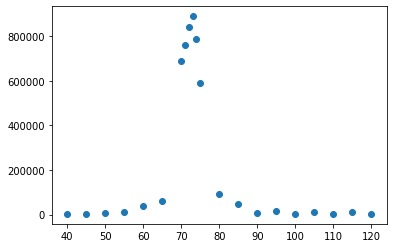

In [54]:
plt.scatter(T1, CS_T1)

In [117]:
def sinc(x,a,b,c):
    """ Sinc(x) = a*sin^2(pi*(x-b)*c)/(pi*(x-b)*c)^2
    x(list/array): datos
    a(float): height of the curve's peak
    b(float): positiion of the center of the peak
    c(float): standard deviation, controls the width of the sinc's peak
    
    return a Normalized Sinc function
    """
    return a*(np.sin(np.pi*(x-b)*c)/(np.pi*(x-b)*c))**2

def fit_sinc(x, y, a,b,c):
    """
    x(list/array): x-axis data
    y(list/array): y-axis data
    a, b, c: parameters of the gaussian
    
    return plot of the data with the function fitted
    """
    plt.figure()
    plt.scatter(x,y, label="Data")
    xx = np.linspace(min(x), max(x), 1000)
    plt.plot(xx, sinc(xx,a,b,c), color="orange", label="Sinc$^2$ fit")
    plt.legend()
#     plt.xlim(0,4)
#     plt.ylim(0,1.2)
    chi2= sum((y-sinc(x,a,b,c))**2)
    plt.title("SC Varying the Temperature" , size=18)
    plt.xlabel("Temperature", size=16)
    plt.ylabel("Single Counts", size=16)

C:\Users\maria\AppData\Local\Temp/ipykernel_18480/44024195.py:10: RuntimeWarning: invalid value encountered in true_divide
  return a*(np.sin(np.pi*(x-b)*c)/(np.pi*(x-b)*c))**2


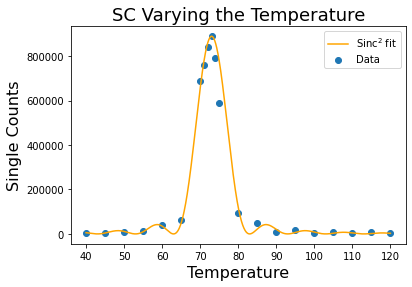

In [118]:
fit_sinc(T1, CS_T1,890000,73,0.1)

In [113]:
def gaussian(x,a,b,c):
    """ Gaussiana
    x(list/array): datos
    a(float): height of the curve's peak
    b(float): positiion of the center of the peak
    c(float): standard deviation, controls the width of the gaussian
    
    return a Gaussian function
    """
    return a*np.exp(-(x-b)**2/(2*c**2))

def fit_gaussian(x, y, a,b,c):
    """
    x(list/array): x-axis data
    y(list/array): y-axis data
    a, b, c: parameters of the gaussian
    
    return plot of the data with the function fitted
    """
    plt.figure()
    plt.scatter(x,y,label="Data")
    xx = np.linspace(min(x), max(x), 1000)
    plt.plot(xx, gaussian(xx,a,b,c), color="orange",label="Gaussian fit")
#     plt.xlim(0,4)
#     plt.ylim(0,1.2)
    chi2= sum((y-gaussian(x,a,b,c))**2)
    plt.legend()
    plt.title("SC Varying the Polarization" , size=18)
    plt.xticks(x)
    plt.xlabel("Degrees", size=16)
    plt.ylabel("Single Counts", size=16)

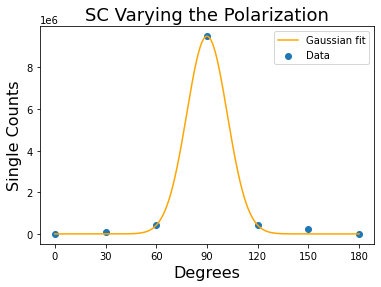

In [114]:
Pol = np.array([0,30,60,90,120,150,180])
CS_P = np.array([1975,85000, 440000,9500000,450000,260000,3200])
fit_gaussian(Pol, CS_P,9500000,90,12)

In [2]:
# lentes que se encuentran en el lab 
F = np.array([11,25,25.4,35,50,75,100,125,150,200,250,300,400,500,750,1000])*10**-3
lamb = 776e-9
omega4= 3.3e-6
omega0=3.3e-6
omega2=19.5e-6

f1=25.4e-3
f2=15e-3

In [15]:
#NO CAMBIAR
factor = omega4*omega0*np.pi/lamb # = 0,0440mm
idx = []
final = np.zeros((len(F), len(F), len(F)))
for i in range(len(F)):
    for j in range(len(F)):
        for k in range(len(F)):
            final[i, j, k] = F[i]*F[j]/F[k]
            if j == i == k == 1:
                Min = abs(F[i]*F[j]/F[k] -factor)
            else:
                if abs(F[i]*F[j]/F[k] -factor) < Min:
                    Min = abs(F[i]*F[j]/F[k] -factor)
#                     factor = [F[i],F[j],F[k]]
            idx.append([F[i], F[j], F[k]])

In [7]:
factor = omega4*omega0*np.pi/lamb # = 0,0440mm
f =[]
idx = []
final = np.zeros((len(F), len(F), len(F)))
for i in range(len(F)):
    for j in range(len(F)):
        for k in range(len(F)):
            Min = abs(F[i]*F[j]/F[k] -factor)
            tol = 0.0001
#             print(Min)
            if Min < tol:
                f.append(F[i]*F[j]/F[k])
                idx.append([F[i], F[j], F[k]])   
print(f,idx, factor)

[0.00012099999999999999] [[0.011, 0.011, 1.0]] 4.408755669792893e-05


In [8]:
factor= omega2/omega0
f =[]
idx = []
for j in range(len(F)):
    for k in range(len(F)):
        Min = abs(F[j]/F[k] -factor)
        tol = 0.01
#             print(Min)
        if Min < tol:
            f.append(F[j]/F[k])
            idx.append([F[j], F[k]])
#             idx.append([F[i], F[j], F[k]])
print(f,idx, factor)

[5.905511811023622] [[0.15, 0.0254]] 5.909090909090908


In [16]:
print(Min)

999999.9999352249


In [40]:
lam = 776e-9 # wavelenght of the laser
w0= 3.3e-6 # waist 
zr = (lam * (484e-6)**2)/(np.pi*w0**2) #rayleigh

In [43]:
print(zr*10**3)

5.31342667966457


In [13]:
[11,25,25.4,35,50,75,100,125,150,200,250,300,400,500,750,1000]*10**-3

TypeError: can't multiply sequence by non-int of type 'float'